# Conditional Routing

`add_conditional_edges`

```python
workflow.add_conditional_edges(
    "source_node",
    condition_function,
    {
        "condition1": "target_node1",
        "condition2": "target_node2",
        "default": END
    }
)
```

In [ ]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Literal

class State(TypedDict):
    user_input: str

def check_user_input(state: State) -> Literal["question", "command", "unknown"]:
    user_input = state["user_input"].lower()

    if user_input.endswith("?"):
        return "question"
    elif user_input.startswith("!"):
        return "command"
    else:
        return "unknown"

workflow = StateGraph(State)

workflow.add_conditional_edges(
    "parse_input",
    check_user_input,
    {
        "question": "answer_question",
        "command": "execute_command",
        "unknown": "ask_clarification"
    }
)


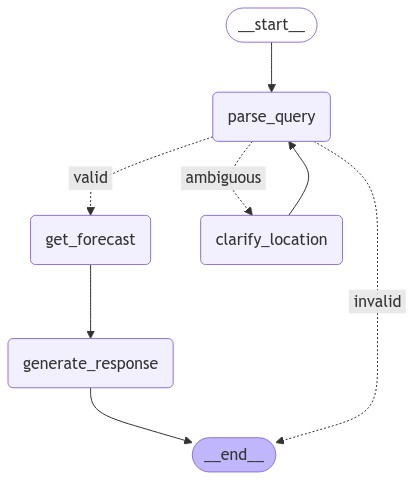